### Assignment 1    |   Ben Kavouras    |   1/13/2023

This program takes in 6 initial user inputs (checks to make sure they work, both internally and with the user), runs them through a formula listed below, and then creates plots from the output, based on user input.

In [13]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path
from datetime import datetime as dt

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k

# Inline outputs of matplotlib
%matplotlib inline

# quit variable to stop the program
quit = False

In [9]:
# Function for the plotted equation
def f(x,y,A,B,n,m,o,p):
    f = A*np.sin(n*np.pi*x+o)+B*np.sin(m*np.pi*y+p)
    return f

In [10]:
# "User Interface" (prints a description of what the code does)
print("This code plots the contours and the line plots of the function f(x)=A*sin(n*pi*x+phi)+B*sin(m*pi*y+psi)")

# Don't mind my variable names, this one keeps the loop waiting until the user is satisfied with their inputs
topg = False
while topg != True:
    # Grabby the inputs
    print("If you wish to enter pi, please enter it as 'pi'. If you wish to enter an equation with pi (ie. 10*pi), please enter it as a number (ie. 34.159)")
    # k.returnfloat just takes a user input and looks for 'pi' and then converts that to the number pi
    A = k.returnfloat(input("Input the value of A"))
    B = k.returnfloat(input("Input the value of B"))
    m = k.returnfloat(input("Input the value of m"))
    n = k.returnfloat(input("Input the value of n"))
    o = k.returnfloat(input("Input the value of phi"))
    p = k.returnfloat(input("Input the value of psi"))

    # Checks with the user to make sure the inputs are good
    print("Your inputs are: A = ",str(A),", B = ",str(B),", n = ",str(n),", m = ",str(m),", phi = ",str(o),", psi = ",str(p))
    
    # k.get2inputs takes two arrays, each containing what a user might put in for a certain option, as well as dialogue, and returns back what the user wants
    correctputs = k.get2inputs(np.array(["Yes","yes","Y","y"]),np.array(["No","no","N","n"]),"Do your inputs look correct?","y","n")
    if correctputs == 1:
        topg = True
        print("Continuing to chart creation")
        continue
    elif correctputs == 2:
        print("OK. Returning to number inputs.")

This code plots the contours and the line plots of the function f(x)=A*sin(n*pi*x+phi)+B*sin(m*pi*y+psi)
If you wish to enter pi, please enter it as 'pi'. If you wish to enter an equation with pi (ie. 10*pi), please enter it as a number (ie. 34.159)
Input the value of A1
Input the value of B3
Input the value of m1
Input the value of n.5
Input the value of phi4
Input the value of psi3
Your inputs are: A =  1.0 , B =  3.0 , n =  0.5 , m =  1.0 , phi =  4.0 , psi =  3.0
Do your inputs look correct? [y/n]y
Continuing to chart creation


In [11]:
# This bit creates a file location where the plots will be saved. Is unique to whatever second this line is read
locationstr = "/PlotOutput-"+str(dt.now().year)+str(dt.now().month)+str(dt.now().day)+str(dt.now().hour)+str(dt.now().minute)+str(dt.now().second)
print("All charts created during this session will be saved in: "+str(Path().cwd())+locationstr)
locate = Path(str(Path().cwd())+locationstr)
locate.mkdir()

2023-01-13 15:02:24.141423
All charts created during this session will be saved in: /home/therealkavouras/Documents/Spring23/Aerospace-Computing/PlotOutput-202311315224


Would you like a contour plot or a line plot? [c/l/e]c
Input the desired X range30
Input the desired y range30


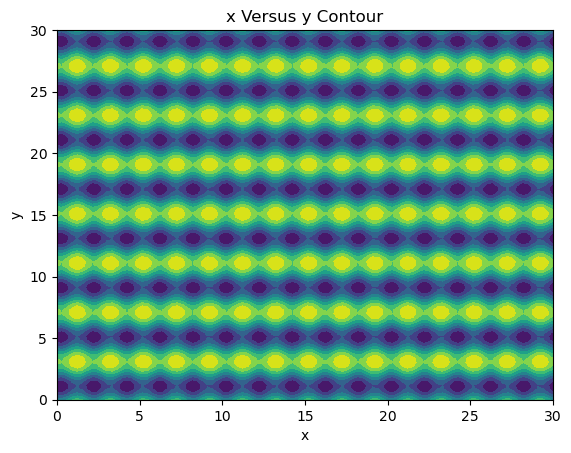

Saved as contourplot202311315234.jpg
Would you like to make another plot? [y/n]n


In [12]:
# This is the main loop of the program, where the user picks which plots they want, and the program plots those inputs
while quit != True:

    # Asks for a contour plot or a line plot
    great = k.get3inputs(np.array(["Contour","contour","C","c"]),np.array(["Line","line","L","l"]),np.array(["Exit","exit","E","e"]),"Would you like a contour plot or a line plot?","c","l","e")
    
    # What if a contour plot?
    if great == 1:

        # First, get the chart ranges
        xrange = k.returnfloat(input("Input the desired X range"))
        yrange = k.returnfloat(input("Input the desired y range"))

        # Then make the plat
        x = np.linspace(0,xrange,100)
        y = np.linspace(0,yrange,100)
        X,Y = np.meshgrid(x,y)
        fig, ax = plt.subplots()
        cp = ax.contourf(X,Y,f(X,Y,A,B,m,n,o,p))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('x Versus y Contour')

        # Then save the plot (again, name is unique to the second its made)
        chartname = "contourplot"+str(dt.now().year)+str(dt.now().month)+str(dt.now().day)+str(dt.now().hour)+str(dt.now().minute)+str(dt.now().second)+".jpg"
        plt.savefig(str(locate)+"/"+chartname,format='jpg')
        plt.show()
        print("Saved as "+chartname)
    
    # What if a line plot?
    elif great == 2:

        # Ask if the user wants a horizontal or vertical line plot
        linetype = k.get2inputs(np.array(["Horizontal","horizontal","H","h"]),np.array(["Vertical","vertical","V","v"]),"Would you like a horizontal or vertical line plot?","h","v")
        
        # What if horizontal?
        if linetype == 1:

            # First, get the chart ranges
            xrange = k.returnfloat(input("Input the desired x range"))
            y = k.returnfloat(input("Input the desired fixed y value"))

            # Then make the plot
            x = np.linspace(0,xrange,100)
            fig, ax = plt.subplots()
            ax.plot(x,f(x,y,A,B,n,m,o,p))
            ax.set_xlabel('x')
            ax.set_ylabel('f(x)')
            ax.set_title('x Versus f(x)')
            ax.set_xticks(np.arange(0,xrange,2*y))

            # Then save the plot (again, name is unique to the second its made)
            chartname = "horizontalplot"+str(dt.now().year)+str(dt.now().month)+str(dt.now().day)+str(dt.now().hour)+str(dt.now().minute)+str(dt.now().second)+".jpg"
            plt.savefig(str(locate)+"/"+chartname,format='jpg')
            plt.show()
            print("Saved as "+chartname)
        
        # What if vertical?
        elif linetype == 2:

            # First, get the chart range
            x = k.returnfloat(input("Input the desired fixed x value"))
            yrange = k.returnfloat(input("Input the desired y range"))

            # Then make the plot
            y = np.linspace(0,yrange,100)
            fig, ay = plt.subplots()
            ay.plot(y, f(y,x,A,B,n,m,o,p))
            ay.set_xlabel('y')
            ay.set_ylabel('f(y)')
            ay.set_title('y Versus f(y)')
            ay.set_yticks(np.arange(0,2*x,yrange))

            # Then save the plot (again, name is unique to the second its made)
            chartname = "verticalplot"+str(dt.now().year)+str(dt.now().month)+str(dt.now().day)+str(dt.now().hour)+str(dt.now().minute)+str(dt.now().second)+".jpg"
            plt.savefig(str(locate)+"/"+chartname,format='jpg')
            plt.show()
            print("Saved as "+chartname)

    # When the program asks if the user wants a contour or line plot, there is a 3rd option to exit. If thats selected, this runs, immediately ending the code
    elif great == 3:
        quit = True
    
    # The user is asked again after the chart is made if they would like to exit
    if quit != True:
        reset = k.get2inputs(np.array(["Yes","yes","Y","y"]),np.array(["No","no","N","n"]),"Would you like to make another plot?","y","n")
        if reset == 2:
            quit = True
    